We will be predicting that whether the patient has diabetes or not on the basis of the features we will provide to our machine learning model.

## 1. Importing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

### Importing Dataset

In [2]:
dataset = pd.read_csv('diabetes-2.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [4]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## 2. Exploratory Data Analysis (EDA)

In [5]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Data Preprocessing

### 3.1. Checking for Missing Values

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
nonzero_inputs = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
inputs = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dataset[nonzero_inputs][dataset[nonzero_inputs].isin({0})].count() 

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [10]:
dataset[nonzero_inputs] = dataset[nonzero_inputs].replace({0:np.NaN}) ####replace 0s in nonzero columns with NaN
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [11]:
dataset[nonzero_inputs][dataset[nonzero_inputs].isin({0})].count() 

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### 3.2. Dealing with Missing Values

In [12]:
#### Apply mean values of each column to the null values of the respective column
imputer = SimpleImputer(missing_values= np.NaN, strategy= 'mean')
imputer.fit(dataset)
rundataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)
rundataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


In [13]:
np.isnan(rundataset).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3.3. Data Visualisation

In [14]:
rundataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

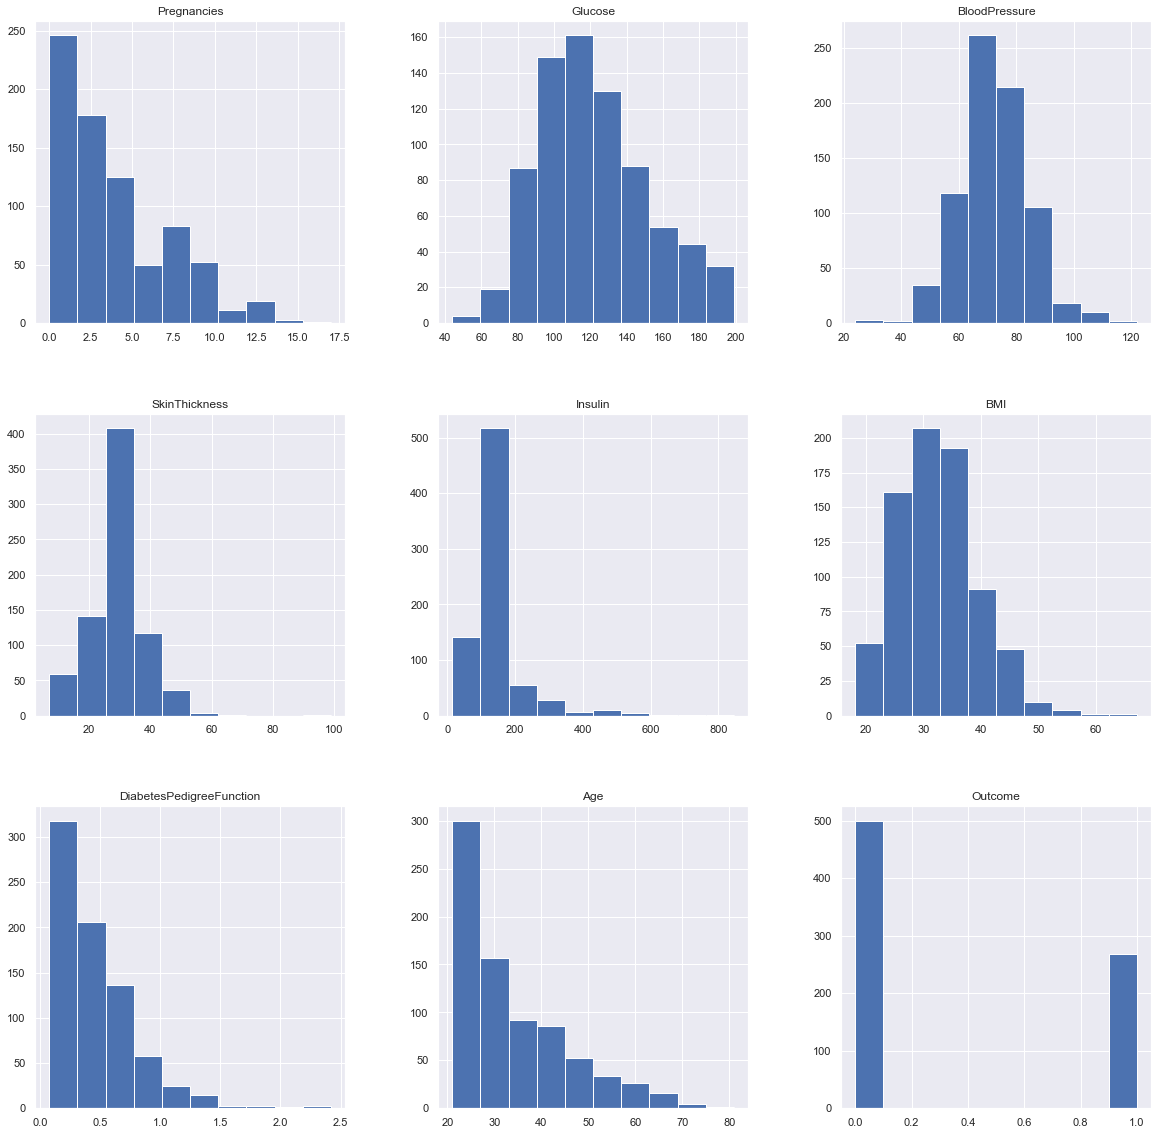

In [15]:
rundataset.hist(figsize = (20,20))

It shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

Positive outcomes:  268
Negative outcomes:  500


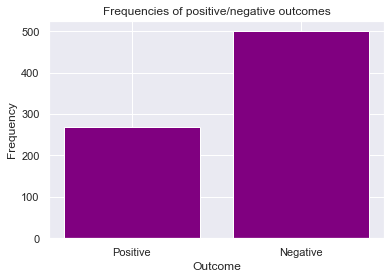

In [16]:
positive = (rundataset['Outcome']==1).sum() ####total number of positive outcomes calculated by testing (Outcome = 1), if True -> +1
negative = (rundataset['Outcome']==0).sum() ####total number of negative outcomes calculated by testing (Outcome = 0), if True -> +1
print('Positive outcomes: ', positive)
print('Negative outcomes: ', negative)

#### Plotting frequencies
xlabel = ['Positive', 'Negative']
outcome = [positive, negative]

plt.bar(xlabel, outcome, color='purple')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Frequencies of positive/negative outcomes')


plt.show()

Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

<AxesSubplot:>

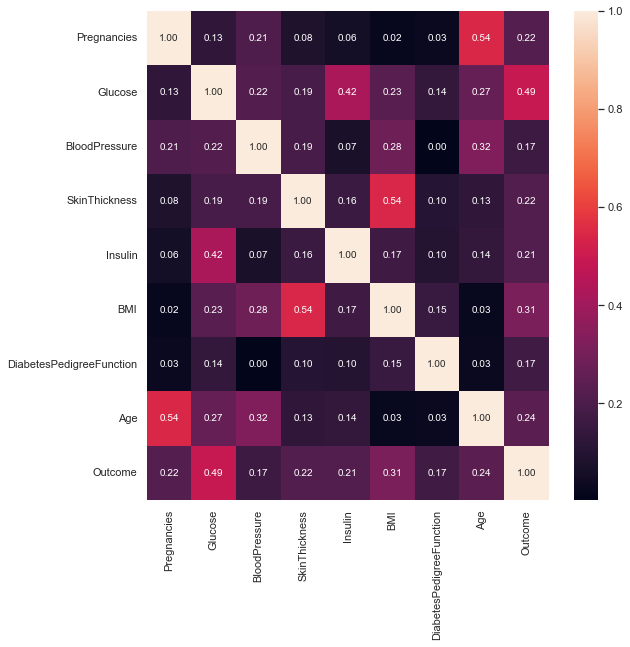

In [17]:
#### Plotting heatmap
plt.figure(figsize=(9,9))
sns.heatmap((np.abs(rundataset.corr())), annot=True, fmt='0.2f')

### 3.4. Standardising Data

In [18]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(rundataset.drop(["Outcome"],axis = 1),), columns=inputs)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## 4. Splitting the Dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## 5. Applying Machine Learning Algorithms

### 5.1. Logistic Regression

In [21]:
#### Buidling model
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [22]:
#### Model accuracy on training dataset
lgr_train = lgr.predict(X_train)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_train, lgr_train), '.2f')))

Accuracy_Score = 0.77


In [23]:
#### Model accuracy on predictions
lgr_prediction = lgr.predict(X_test)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_test, lgr_prediction), '.2f')))

Accuracy_Score = 0.75


In [24]:
print(confusion_matrix(y_test, lgr_prediction))
print(classification_report(y_test, lgr_prediction))

[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [25]:
lgr_cm = confusion_matrix(y_test, lgr_prediction)
lgr_tn, lgr_fp = lgr_cm[0]
lgr_spec = lgr_tn / (lgr_tn + lgr_fp)
print("Specificity =", float(format(lgr_spec, '.2f')))

Specificity = 0.83


In [26]:
lgr_cr = classification_report(y_test, lgr_prediction, output_dict=True)

### 5.2. Support Vector Machine

In [27]:
#### Buidling model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [28]:
#### Model accuracy on training dataset
svm_train = svm.predict(X_train)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_train, svm_train), '.2f')))

Accuracy_Score = 0.83


In [29]:
#### Model accuracy on predictions
svm_prediction = svm.predict(X_test)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_test, svm_prediction), '.2f')))

Accuracy_Score = 0.75


In [30]:
print(confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test, svm_prediction))

[[84 15]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [31]:
svm_cm = confusion_matrix(y_test, svm_prediction)
svm_tn, svm_fp = svm_cm[0]
svm_spec = svm_tn / (svm_tn + svm_fp)
print("Specificity =", float(format(svm_spec, '.2f')))

Specificity = 0.85


In [32]:
svm_cr = classification_report(y_test, svm_prediction, output_dict=True)

### 5.3. K-Nearest Neighbours

In [33]:
#### Buidling model
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
#### Model accuracy on training dataset
knn_train = knn.predict(X_train)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_train, knn_train), '.2f')))

Accuracy_Score = 0.82


In [35]:
#### Model accuracy on predictions
knn_prediction = knn.predict(X_test)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_test, knn_prediction), '.2f')))

Accuracy_Score = 0.71


In [36]:
print(confusion_matrix(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

[[73 26]
 [19 36]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [37]:
knn_cm = confusion_matrix(y_test, knn_prediction)
knn_tn, knn_fp = knn_cm[0]
knn_spec = knn_tn / (knn_tn + knn_fp)
print("Specificity =", float(format(knn_spec, '.2f')))

Specificity = 0.74


In [38]:
knn_cr = classification_report(y_test, knn_prediction, output_dict=True)

### 5.4. Random Forest

In [39]:
#### Buidling model
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [40]:
#### Model accuracy on training dataset
rfc_train = rfc.predict(X_train)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_train, rfc_train), '.2f')))

Accuracy_Score = 1.0


In [41]:
#### Model accuracy on predictions
rfc_prediction = rfc.predict(X_test)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_test, rfc_prediction), '.2f')))

Accuracy_Score = 0.78


In [42]:
#### Classification report & confusion matrix
print(confusion_matrix(y_test, rfc_prediction))
print(classification_report(y_test, rfc_prediction))

[[81 18]
 [16 39]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [43]:
rfc_cm = confusion_matrix(y_test, rfc_prediction)
rfc_tn, rfc_fp = rfc_cm[0]
rfc_spec = rfc_tn / (rfc_tn + rfc_fp)
print("Specificity =", float(format(rfc_spec, '.2f')))

Specificity = 0.82


In [44]:
rfc_cr = classification_report(y_test, rfc_prediction, output_dict=True)

### 5.5. Decision Tree

In [45]:
#### Building model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
#### Model accuracy on training dataset
dtc_train = dtc.predict(X_train)
print("Accuracy_Score =", float(format(metrics.accuracy_score(y_train, dtc_train), '.2f')))

Accuracy_Score = 1.0


In [47]:
#### Model accuracy on predictions
dtc_prediction = dtc.predict(X_test)
print("Accuracy Score =", float(format(metrics.accuracy_score(y_test, dtc_prediction), '.2f')))

Accuracy Score = 0.71


In [48]:
print(confusion_matrix(y_test, dtc_prediction))
print(classification_report(y_test, dtc_prediction))

[[76 23]
 [21 34]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



In [49]:
dtc_cm = confusion_matrix(y_test, dtc_prediction)
dtc_tn, dtc_fp = dtc_cm[0]
dtc_spec = dtc_tn / (dtc_tn + dtc_fp)
print("Specificity =", float(format(dtc_spec, '.2f')))

Specificity = 0.77


In [50]:
dtc_cr = classification_report(y_test, dtc_prediction, output_dict=True)

## 6. Comparative analysis of model evaluation metrics

In [51]:
# Create data
data = {'LGR': [float(format(metrics.accuracy_score(y_train, lgr_train), '.2f')), float(format(metrics.accuracy_score(y_test, lgr_prediction), '.2f')), float(format(lgr_cr['0']['f1-score'], '.2f')), float(format(lgr_cr['1']['f1-score'], '.2f')), float(format(lgr_spec, '.2f'))],
        'SVM': [float(format(metrics.accuracy_score(y_train, svm_train), '.2f')), float(format(metrics.accuracy_score(y_test, svm_prediction), '.2f')), float(format(svm_cr['0']['f1-score'], '.2f')), float(format(svm_cr['1']['f1-score'], '.2f')), float(format(svm_spec, '.2f'))],
        'KNN': [float(format(metrics.accuracy_score(y_train, knn_train), '.2f')), float(format(metrics.accuracy_score(y_test, knn_prediction), '.2f')), float(format(knn_cr['0']['f1-score'], '.2f')), float(format(knn_cr['1']['f1-score'], '.2f')), float(format(knn_spec, '.2f'))],
        'RFC': [float(format(metrics.accuracy_score(y_train, rfc_train), '.2f')), float(format(metrics.accuracy_score(y_test, rfc_prediction), '.2f')), float(format(rfc_cr['0']['f1-score'], '.2f')), float(format(rfc_cr['1']['f1-score'], '.2f')), float(format(rfc_spec, '.2f'))],
        'DTC': [float(format(metrics.accuracy_score(y_train, dtc_train), '.2f')), float(format(metrics.accuracy_score(y_test, dtc_prediction), '.2f')), float(format(dtc_cr['0']['f1-score'], '.2f')), float(format(dtc_cr['1']['f1-score'], '.2f')), float(format(dtc_spec, '.2f'))],
        'Metric': ['Train Accuracy Score', 'Test Accuracy Score', 'F1-Score 0', 'F1-Score 1', 'Specificity']}
comparison_table = pd.DataFrame(data)
comparison_table.set_index('Metric', inplace=True)
comparison_table


,LGR,SVM,KNN,RFC,DTC
Metric,,,,,
Train Accuracy Score,0.77,0.83,0.82,1.00,1.00
Test Accuracy Score,0.75,0.75,0.71,0.78,0.71
F1-Score 0,0.81,0.82,0.76,0.83,0.78
F1-Score 1,0.64,0.63,0.62,0.70,0.61
Specificity,0.83,0.85,0.74,0.82,0.77


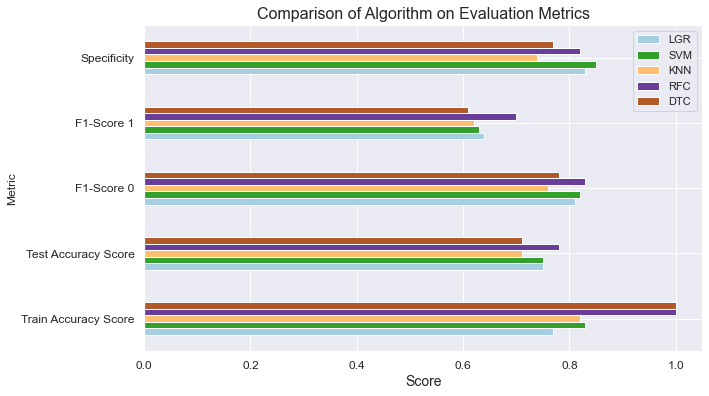

In [52]:
# create the bar chart
chart = comparison_table.plot(kind='barh', figsize=(10,6), fontsize=12, colormap='Paired')

# set the x-axis label
chart.set_xlabel('Score', fontsize=14)

# set the title
chart.set_title('Comparison of Algorithm on Evaluation Metrics', fontsize=16)

# show the plot
plt.show()


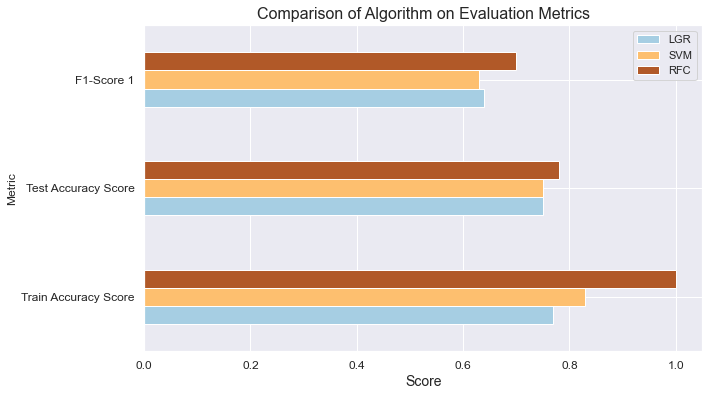

In [53]:
# Create data
newdata = {'LGR': [float(format(metrics.accuracy_score(y_train, lgr_train), '.2f')), float(format(metrics.accuracy_score(y_test, lgr_prediction), '.2f')), float(format(lgr_cr['1']['f1-score'], '.2f'))],
        'SVM': [float(format(metrics.accuracy_score(y_train, svm_train), '.2f')), float(format(metrics.accuracy_score(y_test, svm_prediction), '.2f')), float(format(svm_cr['1']['f1-score'], '.2f'))],
        'RFC': [float(format(metrics.accuracy_score(y_train, rfc_train), '.2f')), float(format(metrics.accuracy_score(y_test, rfc_prediction), '.2f')), float(format(rfc_cr['1']['f1-score'], '.2f'))],
        'Metric': ['Train Accuracy Score', 'Test Accuracy Score', 'F1-Score 1']}
new_comparison_table = pd.DataFrame(newdata)
new_comparison_table.set_index('Metric', inplace=True)

# create the bar chart
newchart = new_comparison_table.plot(kind='barh', figsize=(10,6), fontsize=12, colormap='Paired')

# set the x-axis label
newchart.set_xlabel('Score', fontsize=14)

# set the title
newchart.set_title('Comparison of Algorithm on Evaluation Metrics', fontsize=16)

# show the plot
plt.show()


Conclusion: RFC is the best model for prediction because of highest F1-score and highest accuracy score, though it might be prone to overfitting.

## 7. Analysis & prediction on chosen algorithm

In [54]:
# Feature importances
rfc.feature_importances_

array([0.07113675, 0.23948875, 0.081904  , 0.08291888, 0.09268994,
       0.1623734 , 0.1239479 , 0.14554037])

<AxesSubplot:>

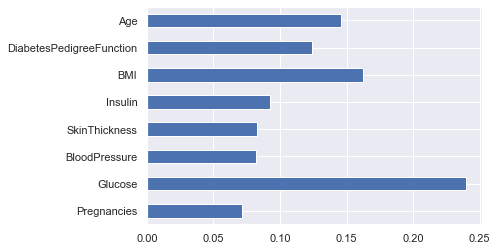

In [55]:
# Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [56]:
# Saving model - RFC
import pickle
saved_model = pickle.dumps(rfc)

# Loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# Making predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [57]:
rundataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [58]:
new_patient = np.array([0,137,40,35,168,43.1,2.228,33])
scaled_new =  sc_X.fit_transform(new_patient.reshape(1, -1))
rfc.predict(scaled_new)

C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)